In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data_april = pd.read_csv("/content/drive/MyDrive/Machine learning (personal)/Data/VoiceCalling/CallVoiceQualityExperience-2018-April.csv")
data_may = pd.read_csv("/content/drive/MyDrive/Machine learning (personal)/Data/VoiceCalling/CallVoiceQuality_Data_2018_May.csv")

In [3]:
# Add a 'Month' column to differentiate between April and May data
data_april['Month'] = 'April'
data_may['Month'] = 'May'

In [4]:
# Concatenate the data
merged_data = pd.concat([data_april, data_may], ignore_index=True)

In [5]:
# Convert Rating to numeric
merged_data['Rating'] = pd.to_numeric(merged_data['Rating'], errors='coerce')


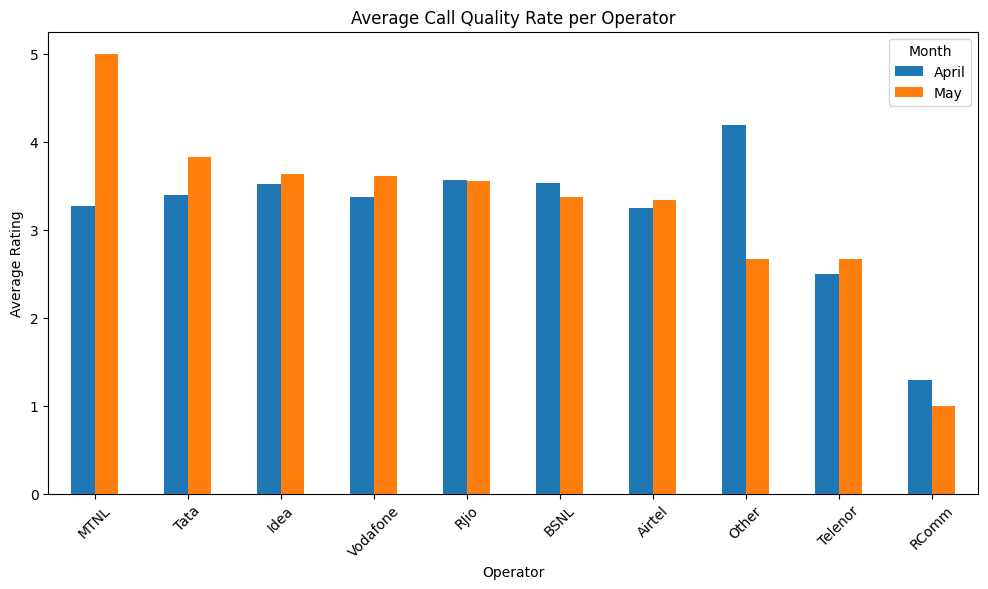

In [6]:
# Vertical bar chart of average call quality rate per operator
plt.figure(figsize=(12, 6))
operator_avg_rating = merged_data.groupby(['Operator', 'Month'])['Rating'].mean().unstack().sort_values(by='May', ascending=False)
operator_avg_rating.plot(kind='bar', ax=plt.gca())
plt.title('Average Call Quality Rate per Operator')
plt.xlabel('Operator')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.legend(title='Month')
plt.show()


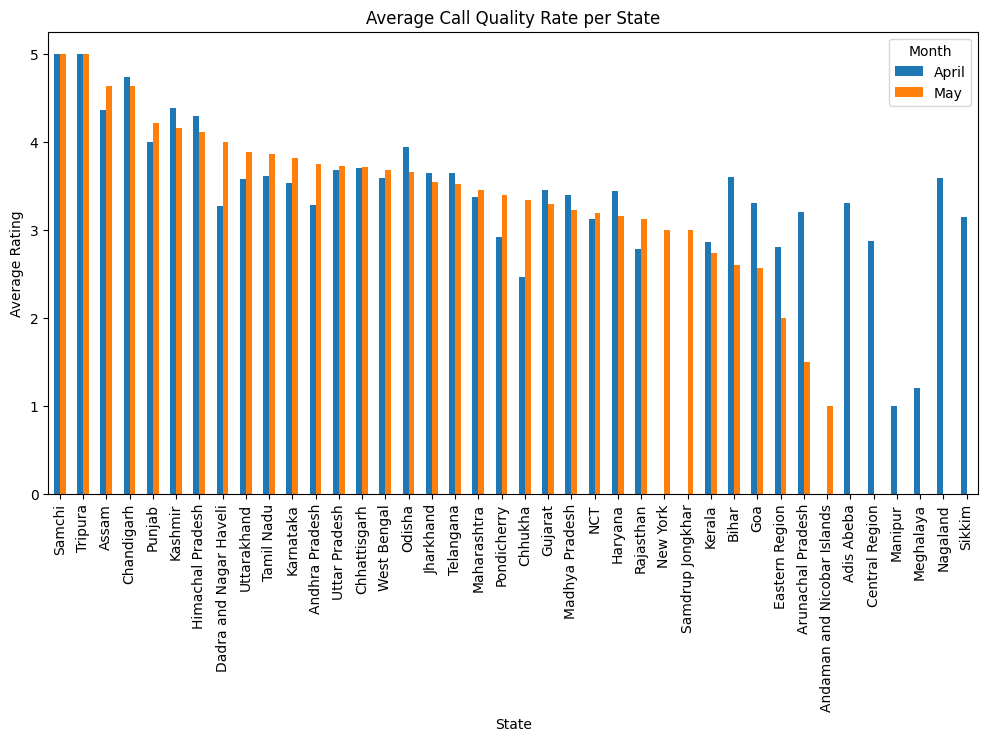

In [7]:
# Vertical bar chart of the quality level per each state in India
plt.figure(figsize=(12, 6))
state_avg_rating = merged_data.groupby(['State Name', 'Month'])['Rating'].mean().unstack().sort_values(by='May', ascending=False)
state_avg_rating.plot(kind='bar', ax=plt.gca())
plt.title('Average Call Quality Rate per State')
plt.xlabel('State')
plt.ylabel('Average Rating')
plt.xticks(rotation=90)
plt.legend(title='Month')
plt.show()

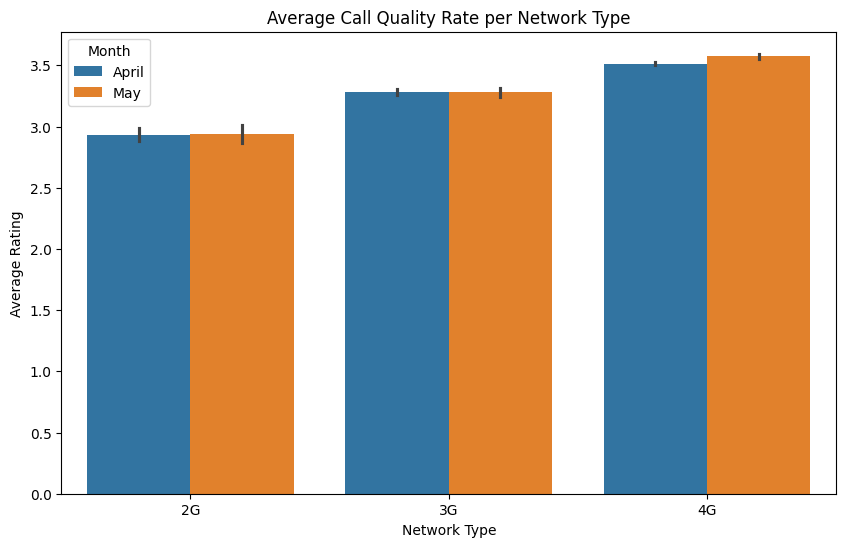

In [8]:
# Vertical bar chart showing the relationship between the call quality and the network type
plt.figure(figsize=(10, 6))
sns.barplot(x='Network Type', y='Rating', hue='Month', data=merged_data, order=['2G', '3G', '4G'])
plt.title('Average Call Quality Rate per Network Type')
plt.xlabel('Network Type')
plt.ylabel('Average Rating')
plt.legend(title='Month')
plt.show()


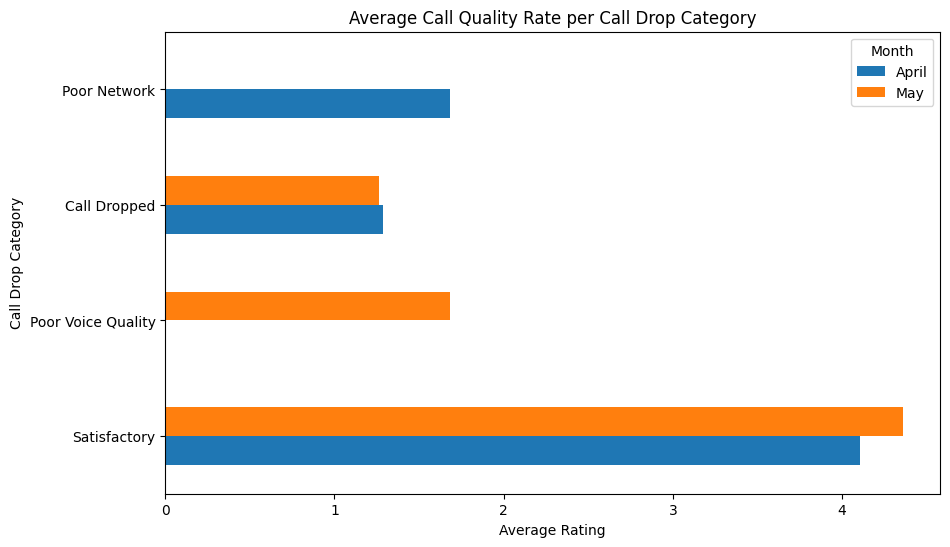

In [9]:
# Horizontal bar chart of average call quality rate per Call Drop Category
plt.figure(figsize=(10, 6))
call_drop_avg_rating = merged_data.groupby(['Call Drop Category', 'Month'])['Rating'].mean().unstack().sort_values(by='May', ascending=False)
call_drop_avg_rating.plot(kind='barh', ax=plt.gca())
plt.title('Average Call Quality Rate per Call Drop Category')
plt.xlabel('Average Rating')
plt.ylabel('Call Drop Category')
plt.legend(title='Month')
plt.show()

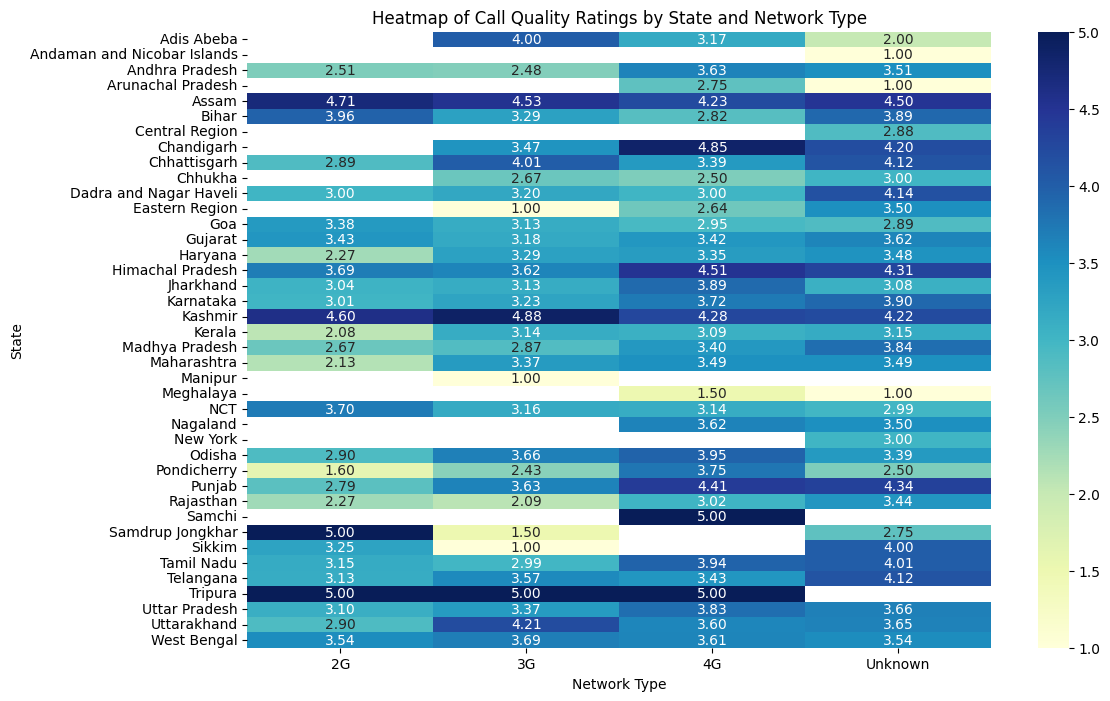

In [10]:
# Heat map between state, Network Type and rating
state_network_pivot = merged_data.pivot_table(index='State Name', columns='Network Type', values='Rating', aggfunc='mean')
plt.figure(figsize=(12, 8))
sns.heatmap(state_network_pivot, cmap='YlGnBu', annot=True, fmt=".2f")
plt.title('Heatmap of Call Quality Ratings by State and Network Type')
plt.xlabel('Network Type')
plt.ylabel('State')
plt.show()

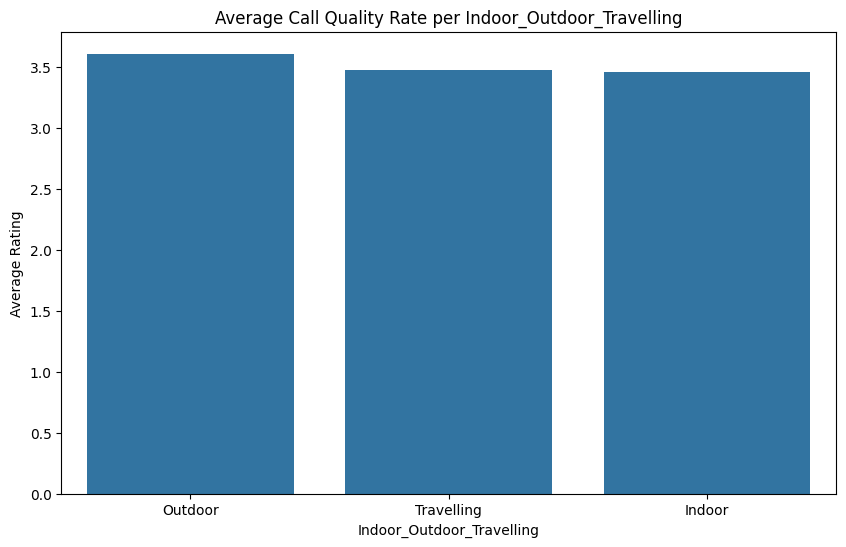

In [11]:
# Vertical bar chart of average call quality rate per Indoor_Outdoor_Travelling
plt.figure(figsize=(10, 6))
io_travelling_avg_rating = merged_data.groupby('In Out Travelling')['Rating'].mean().sort_values(ascending=False)
sns.barplot(x=io_travelling_avg_rating.index, y=io_travelling_avg_rating.values)
plt.title('Average Call Quality Rate per Indoor_Outdoor_Travelling')
plt.xlabel('Indoor_Outdoor_Travelling')
plt.ylabel('Average Rating')
plt.show()

In [12]:
#1. What is the level of overall call quality? (by the operator, by the network.

# Average call quality by operator
operator_avg_quality = merged_data.groupby('Operator')['Rating'].mean().sort_values(ascending=False)
print(operator_avg_quality)

Operator
Other       3.888889
Tata        3.624703
RJio        3.562902
Idea        3.560112
BSNL        3.485532
Vodafone    3.451958
MTNL        3.291667
Airtel      3.277418
Telenor     2.659574
RComm       1.287671
Name: Rating, dtype: float64


In [14]:
# Average call quality by network type
network_avg_quality = merged_data.groupby('Network Type')['Rating'].mean().sort_values(ascending=False)
print(network_avg_quality)

Network Type
Unknown    3.615250
4G         3.535992
3G         3.282701
2G         2.935904
Name: Rating, dtype: float64


In [15]:
#2. Which operators provide low-value services?

# Operators with lowest average call quality ratings
low_value_operators = operator_avg_quality.nsmallest(5)  # Selecting bottom 5 operators
print(low_value_operators)

Operator
RComm       1.287671
Telenor     2.659574
Airtel      3.277418
MTNL        3.291667
Vodafone    3.451958
Name: Rating, dtype: float64


In [16]:
#3. What is the frequency of poor-quality calls?
# Frequency distribution of call quality ratings
call_quality_distribution = merged_data['Rating'].value_counts().sort_index()

# Poor-quality calls (assuming rating <= 2 as poor)
poor_quality_calls = call_quality_distribution.loc[:2].sum()
total_calls = merged_data['Rating'].count()

poor_quality_frequency = poor_quality_calls / total_calls
print("Frequency of Poor-Quality Calls:", poor_quality_frequency)

Frequency of Poor-Quality Calls: 0.267801126766474
